Import Data Set dari Github

In [64]:
# import data
!wget https://raw.githubusercontent.com/mobs3288/ML_Case-Based-1/main/audit_risk.csv

--2022-11-08 08:19:55--  https://raw.githubusercontent.com/mobs3288/ML_Case-Based-1/main/audit_risk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80420 (79K) [text/plain]
Saving to: ‘audit_risk.csv.2’

audit_risk.csv.2    100%[===================>]  78.54K  --.-KB/s    in 0.01s   

2022-11-08 08:19:55 (6.28 MB/s) - ‘audit_risk.csv.2’ saved [80420/80420]



In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  

In [19]:
# read data
df = pd.read_csv('audit_risk.csv')
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


**DATA PROCESS**

In [20]:
# Menampilkan Info dari dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [22]:
# Menhapus column TOTAL dikarenakan TOTAL merupakan perjumlahan dari Risk_A dan Risk_B
# Column TOTAL dihapus guna mengurangi data yang redundan pada dataset
df = df.drop(['TOTAL'], axis = 1) 

In [23]:
# Mengecek apakah ada column data yang tidak memiliki nilai
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [24]:
# Column Money_Value di isi dengan mean
df['Money_Value'].fillna((df['Money_Value'].mean()), inplace = True)

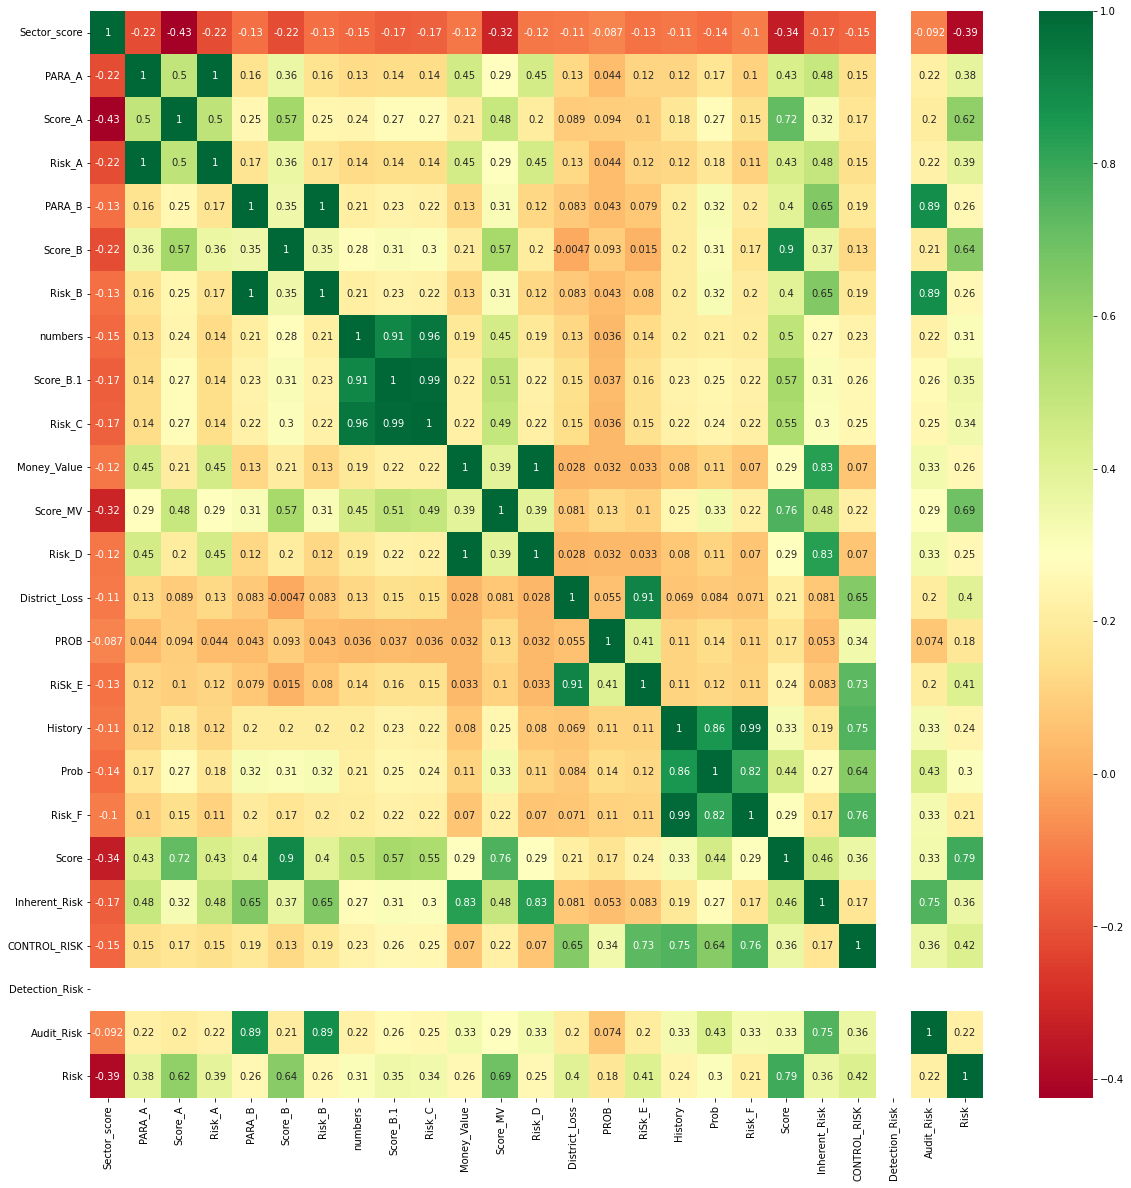

In [26]:
# Lalu Menampilkan seluruh data dalam bentuk Heatmap
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [27]:
# Detection_risk dihapus karena tidak mempunyai kaitan apapun terhadap data lain
df = df.drop(['Detection_Risk'], axis = 1) 

In [28]:
# Mencari Nilai object yang berada di Location ID
df['LOCATION_ID'].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [29]:
# Menghapus data yang bertipe string
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)

In [67]:
# Menghapus yang duplikat, dan menampilan total row setelah preprocessing
df = df.drop_duplicates(keep = 'first')
print("New Total Rows after Preprocessing: ",len(df))

New Total Rows after Preprocessing:  760


In [31]:
# Menampilkan seluruh data info dari dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    float64
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   Risk_A         760 non-null    float64
 5   PARA_B         760 non-null    float64
 6   Score_B        760 non-null    float64
 7   Risk_B         760 non-null    float64
 8   numbers        760 non-null    float64
 9   Score_B.1      760 non-null    float64
 10  Risk_C         760 non-null    float64
 11  Money_Value    760 non-null    float64
 12  Score_MV       760 non-null    float64
 13  Risk_D         760 non-null    float64
 14  District_Loss  760 non-null    float64
 15  PROB           760 non-null    float64
 16  RiSk_E         760 non-null    float64
 17  History        760 non-null    float64
 18  Prob      

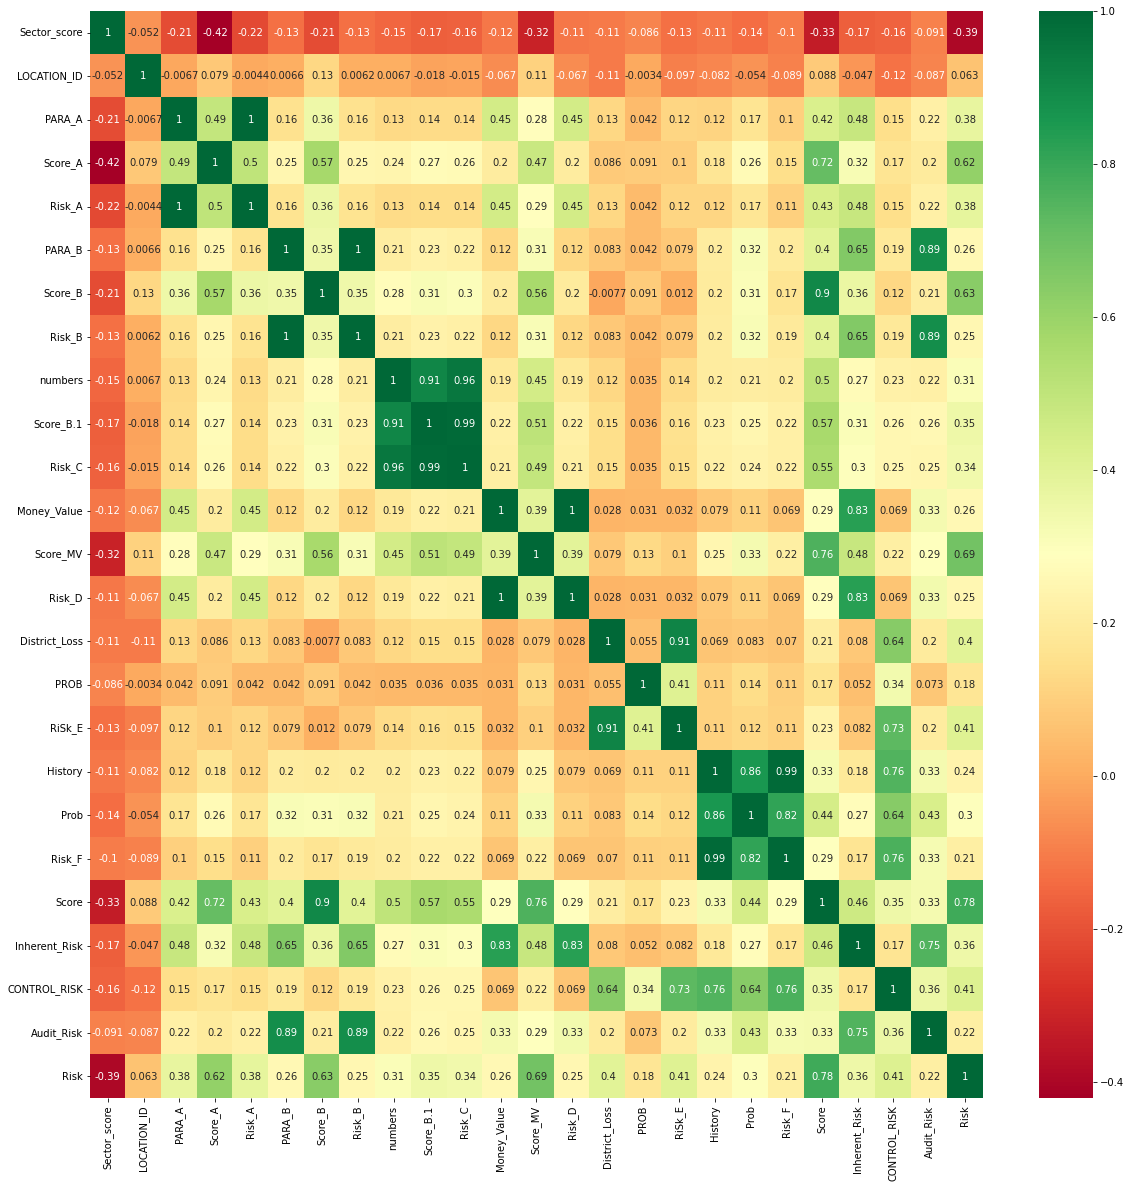

In [65]:
# Menampilkan Kembali Heatmap yg telah diperbarui
corr = df.corr()
top_corr_features = corr.index
plt.figure(figsize=(20,20))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

**TRAIN MLP** 

In [33]:
# Spliting data
X=df[['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B', 'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK']]
y=df['Risk']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset ke training set dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% test

In [63]:
# Import MLPClassifer 
from sklearn.neural_network import MLPClassifier

# Membuat objek model
clf = MLPClassifier(hidden_layer_sizes=(6,5),
                    random_state=5,
                    verbose=True,
                    learning_rate_init=0.01,
                    max_iter = 335)

# Fit data ke model
clf.fit(X_train,y_train)

Iteration 1, loss = 3.37715388
Iteration 2, loss = 2.26497690
Iteration 3, loss = 1.43858174
Iteration 4, loss = 0.91333683
Iteration 5, loss = 0.59975226
Iteration 6, loss = 0.48321006
Iteration 7, loss = 0.41399537
Iteration 8, loss = 0.37683265
Iteration 9, loss = 0.35075072
Iteration 10, loss = 0.32707963
Iteration 11, loss = 0.30879936
Iteration 12, loss = 0.30044503
Iteration 13, loss = 0.29049074
Iteration 14, loss = 0.27707280
Iteration 15, loss = 0.26640373
Iteration 16, loss = 0.25341808
Iteration 17, loss = 0.24156382
Iteration 18, loss = 0.23270777
Iteration 19, loss = 0.22252302
Iteration 20, loss = 0.21252474
Iteration 21, loss = 0.20252462
Iteration 22, loss = 0.19430453
Iteration 23, loss = 0.18855341
Iteration 24, loss = 0.18050589
Iteration 25, loss = 0.17416964
Iteration 26, loss = 0.16917331
Iteration 27, loss = 0.16381161
Iteration 28, loss = 0.15994230
Iteration 29, loss = 0.15542577
Iteration 30, loss = 0.15210320
Iteration 31, loss = 0.14716947
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01, max_iter=335,
              random_state=5, verbose=True)

In [82]:
# Melakukan Prediksi pada dataset
ypred=clf.predict(X_test)

# Import accuracy score 
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Menghitung nilai akurasi
akurasi = accuracy_score(y_test,ypred) * 100
presisi = precision_score(y_test,ypred) * 100
recall = recall_score(y_test,ypred) * 100

print("Akurasi: ", akurasi)
print("Presisi: ", presisi)
print("Recall : ", recall)

Akurasi:  98.24561403508771
Presisi:  98.88888888888889
Recall :  96.73913043478261


In [93]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,ypred))

[[135   1]
 [  3  89]]
